# Day 7 - Supervised Learning Challenge

Let’s take what you’ve learned over the past week and put it into practice. The dataset we will be using contains two csv files ‘data’ and ‘target’.

Each row in the ‘data’ belongs to a ‘measurement’ and each column represents a ‘feature’. For each row in the ‘data’ you have a corresponding class label in ‘target’. You can consider the row-numbers as keys.

Complete the following:

Explore your data. 
- Can you identify anything interest that is worth noting from the data?
- Define a set of possible classifiers and show which one performs best. Keep in mind the problem of overfitting.
- Using feature selection try to reduce the number of features. In the dataset you have over 100 features. Find the good ones for your classifier.

Keep in mind that there is no best solution to the challenge. Show how you approach a problem, and the skills/methods you use in that approach.

Each row in the ‘features_train’ and ‘features_test’ belongs to a ‘measurement’ and each column represents a ‘feature’. For each row in the ‘features_train’ you have a corresponding class label in ‘target_train’. You can consider the row-numbers as keys.

In [491]:
import sklearn
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from typing import Dict, Tuple, Callable
from sklearn import svm
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import RandomizedSearchCV

In [492]:
data = pd.read_csv('features_train.csv')

In [493]:
target = pd.read_csv('target_train.csv')

In [477]:
finaltest = pd.read_csv('features_test.csv')

In [478]:
finaltest

,Id,0,1,2,3,4,5,6,7,8,...,110,111,112,113,114,115,116,117,118,119
0,0,0.242392,0.524801,9.531945,0.551043,0.853324,2.084798,-23.881055,1.752809,4.019658,...,0.996646,0.464636,0.927718,2.136614,-0.625167,11.164489,12.651970,3.191951,0.770754,11.564876
1,1,0.197594,1.029150,13.064256,2.697584,0.032053,0.555707,-47.774112,0.211458,-5.489373,...,16.166253,0.074028,0.114691,0.700676,0.909923,-12.253487,-0.839493,3.405661,0.772885,2.602072
2,2,0.676448,0.250171,10.370677,1.255717,0.028614,1.916394,65.747722,1.791534,-10.868221,...,1.382589,0.527797,0.818678,0.780533,1.833105,9.943211,-11.567759,0.387331,0.345355,0.274009
3,3,1.561018,0.617100,0.379516,1.515827,0.005581,0.002844,-11.036037,0.154748,17.727657,...,3.028235,0.664532,0.124984,0.438145,0.562478,1.999034,-3.481156,0.374161,0.657491,0.944878
4,4,0.403669,6.981975,0.535448,0.654590,0.670791,2.377098,8.185199,0.703429,5.420341,...,2.218101,0.228779,0.156150,1.444829,0.905621,4.061059,3.467491,0.339719,0.411329,0.382129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,1.741515,0.134820,7.248496,1.042125,0.000725,0.027404,-26.098770,0.522976,11.508938,...,1.032681,0.117975,0.527086,0.910612,-0.013523,-17.638597,8.928354,2.404990,0.443886,1.707916
19996,19996,1.358898,0.221614,8.012158,3.175524,0.552219,0.223238,-15.627277,2.255131,6.387290,...,0.881214,0.913261,0.591320,0.516800,0.770858,-5.014199,-9.313518,1.043028,0.230945,0.462449
19997,19997,0.000939,1.227475,48.685046,1.419278,2.873372,0.784268,-32.856775,0.661216,15.567761,...,0.652379,0.070280,0.419313,1.644102,-0.628569,-0.407432,0.777995,0.803730,0.557201,2.501288
19998,19998,0.127647,4.263982,22.509525,0.383584,0.205385,0.630785,29.201405,3.111156,-8.013544,...,1.940163,0.720134,0.068648,0.258238,0.769108,-4.154734,-11.241676,5.395268,0.765356,0.650460


In [479]:
#Each row in the ‘data’ belongs to a ‘measurement’
data.head()

,Id,0,1,2,3,4,5,6,7,8,...,110,111,112,113,114,115,116,117,118,119
0,0,2.311705,0.445665,7.020637,1.582505,3.010977,1.375501,29.897623,2.886738,-8.641869,...,0.642797,0.706869,0.997519,1.270321,0.109460,2.829606,-8.292344,1.423754,0.090224,2.006436
1,1,0.580430,0.200428,22.176950,0.479475,0.173418,0.106690,-28.162402,5.388960,-9.188298,...,1.966491,0.330869,0.449754,0.257662,-1.131653,-0.908362,20.468617,1.146844,0.142068,0.373541
2,2,0.042687,0.641976,1.663984,0.998398,1.262488,0.784453,-22.016388,1.512673,-3.526049,...,0.897811,0.610529,0.158270,5.695307,0.358590,-8.164399,0.596139,0.522287,0.832107,4.264087
3,3,0.060388,1.408700,92.827212,2.691115,0.645211,0.710104,12.132919,1.606096,-0.782570,...,1.375550,0.708163,0.537862,1.357389,-1.659754,-1.105801,-6.426477,0.404628,0.452828,1.106436
4,4,1.045148,0.704313,4.823582,0.546102,0.397827,0.606078,-11.135888,0.639788,-9.182691,...,10.556016,0.225400,0.672425,0.257381,-0.435355,7.744958,10.908781,4.413541,0.782079,0.279165


In [480]:
#For each row in the ‘data’ you have a corresponding class label in ‘target’
target.head()

,Id,Expected
0,0,0
1,1,0
2,2,2
3,3,1
4,4,2


In [481]:
#data.isna().sum()
#target.isna().sum()

#data.isnull().values.any()
#target.isnull().values.any()

#no data found found with missing values -woo!

In [482]:
# Place the DataFrames side by side
data2 = pd.concat([data, target], axis=1)

In [483]:
data2.head()

,Id,0,1,2,3,4,5,6,7,8,...,112,113,114,115,116,117,118,119,Id,Expected
0,0,2.311705,0.445665,7.020637,1.582505,3.010977,1.375501,29.897623,2.886738,-8.641869,...,0.997519,1.270321,0.109460,2.829606,-8.292344,1.423754,0.090224,2.006436,0,0
1,1,0.580430,0.200428,22.176950,0.479475,0.173418,0.106690,-28.162402,5.388960,-9.188298,...,0.449754,0.257662,-1.131653,-0.908362,20.468617,1.146844,0.142068,0.373541,1,0
2,2,0.042687,0.641976,1.663984,0.998398,1.262488,0.784453,-22.016388,1.512673,-3.526049,...,0.158270,5.695307,0.358590,-8.164399,0.596139,0.522287,0.832107,4.264087,2,2
3,3,0.060388,1.408700,92.827212,2.691115,0.645211,0.710104,12.132919,1.606096,-0.782570,...,0.537862,1.357389,-1.659754,-1.105801,-6.426477,0.404628,0.452828,1.106436,3,1
4,4,1.045148,0.704313,4.823582,0.546102,0.397827,0.606078,-11.135888,0.639788,-9.182691,...,0.672425,0.257381,-0.435355,7.744958,10.908781,4.413541,0.782079,0.279165,4,2


In [484]:
# now we have 2 id columns, so we will remove these 
data2 = data2.drop(columns=['Id'])

In [485]:
data2.head()

,0,1,2,3,4,5,6,7,8,9,...,111,112,113,114,115,116,117,118,119,Expected
0,2.311705,0.445665,7.020637,1.582505,3.010977,1.375501,29.897623,2.886738,-8.641869,0.414074,...,0.706869,0.997519,1.270321,0.109460,2.829606,-8.292344,1.423754,0.090224,2.006436,0
1,0.580430,0.200428,22.176950,0.479475,0.173418,0.106690,-28.162402,5.388960,-9.188298,1.203232,...,0.330869,0.449754,0.257662,-1.131653,-0.908362,20.468617,1.146844,0.142068,0.373541,0
2,0.042687,0.641976,1.663984,0.998398,1.262488,0.784453,-22.016388,1.512673,-3.526049,0.176904,...,0.610529,0.158270,5.695307,0.358590,-8.164399,0.596139,0.522287,0.832107,4.264087,2
3,0.060388,1.408700,92.827212,2.691115,0.645211,0.710104,12.132919,1.606096,-0.782570,3.147786,...,0.708163,0.537862,1.357389,-1.659754,-1.105801,-6.426477,0.404628,0.452828,1.106436,1
4,1.045148,0.704313,4.823582,0.546102,0.397827,0.606078,-11.135888,0.639788,-9.182691,0.841208,...,0.225400,0.672425,0.257381,-0.435355,7.744958,10.908781,4.413541,0.782079,0.279165,2


In [486]:
data2.shape

(10000, 121)

In [487]:
X = data2.loc[:, data2.columns != 'Expected']
y = data2['Expected'].values

In [488]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]

In [489]:
#no columns removed due to VIF correlation
#calculate_vif_(X, thresh=5.0)

In [490]:
# create training and testing data sets which we will use later after we select a model from k-1 cross validation
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

ValueError: Found input variables with inconsistent numbers of samples: [2028, 10000]

In [380]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,2.311705,0.445665,7.020637,1.582505,3.010977,1.375501,29.897623,2.886738,-8.641869,0.414074,...,0.642797,0.706869,0.997519,1.270321,0.109460,2.829606,-8.292344,1.423754,0.090224,2.006436
1,0.580430,0.200428,22.176950,0.479475,0.173418,0.106690,-28.162402,5.388960,-9.188298,1.203232,...,1.966491,0.330869,0.449754,0.257662,-1.131653,-0.908362,20.468617,1.146844,0.142068,0.373541
2,0.042687,0.641976,1.663984,0.998398,1.262488,0.784453,-22.016388,1.512673,-3.526049,0.176904,...,0.897811,0.610529,0.158270,5.695307,0.358590,-8.164399,0.596139,0.522287,0.832107,4.264087
3,0.060388,1.408700,92.827212,2.691115,0.645211,0.710104,12.132919,1.606096,-0.782570,3.147786,...,1.375550,0.708163,0.537862,1.357389,-1.659754,-1.105801,-6.426477,0.404628,0.452828,1.106436
4,1.045148,0.704313,4.823582,0.546102,0.397827,0.606078,-11.135888,0.639788,-9.182691,0.841208,...,10.556016,0.225400,0.672425,0.257381,-0.435355,7.744958,10.908781,4.413541,0.782079,0.279165


In [381]:
#X.hist(figsize = (30,20));

In [382]:
# Transform the skewed numeric features by taking log(feature + 1).
# This will make the features more normal.

#from scipy.stats import skew
#import math
#skewed = X.apply(lambda x: skew(x.dropna().astype(float)))
#skewed = skewed[skewed > 0.75]
#skewed = skewed.index

#X[skewed] = np.log10(X[skewed])

In [383]:
#transforming the test data
#X_test[skewed] = np.log10(X_test[skewed])

In [384]:
#scaling not needed for randomforrest
#from sklearn.preprocessing import RobustScaler

In [385]:
#scaler = RobustScaler()
#scaled_X = scaler.fit_transform(X)

In [386]:
#scaled_X = pd.DataFrame(scaled_X, columns = X.columns)

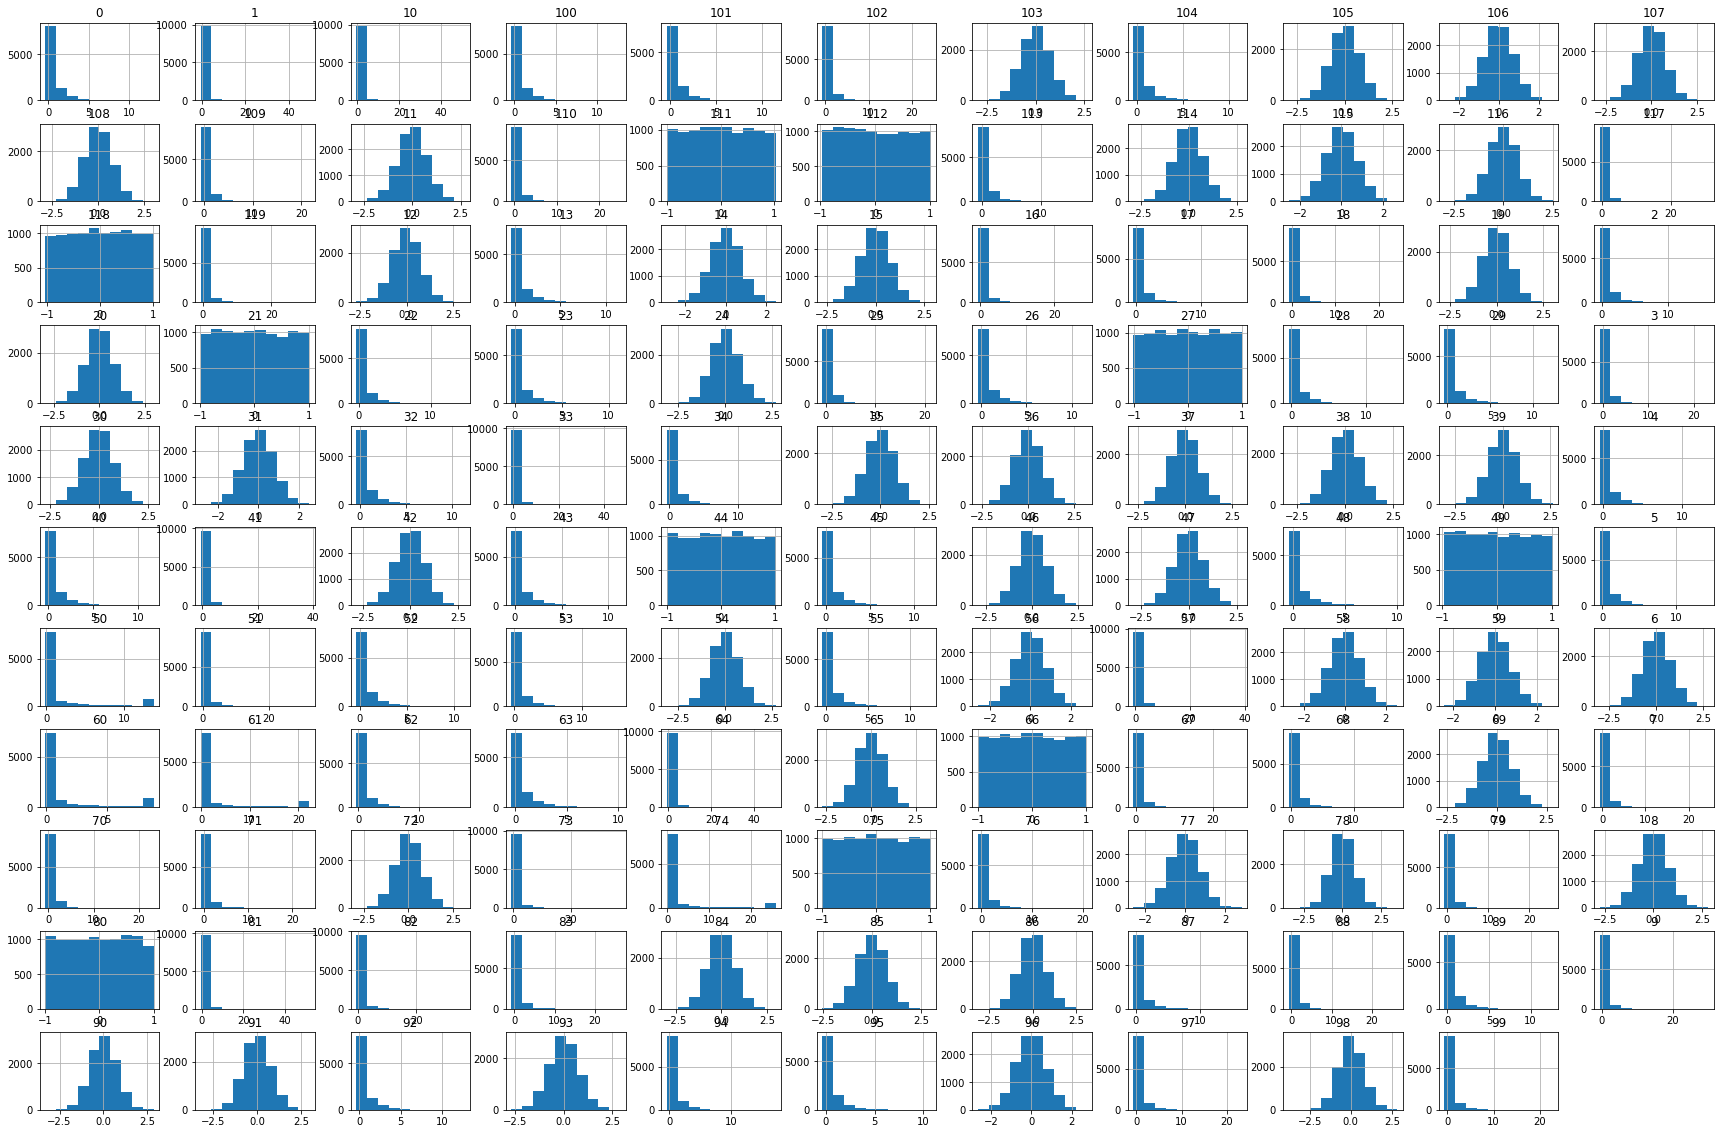

In [387]:
scaled_X.hist(figsize = (30,20));

In [473]:
rf = RandomForestClassifier()
#pipeline to include feature selection and model selection
pipeline = Pipeline([('kbest',SelectKBest()),('classifier', rf)])


param_grid = {
    "classifier__n_estimators": [100],
    "classifier__max_depth":[22],
    "classifier__min_samples_split":[5],
    "classifier__min_samples_leaf":[1],
    "classifier__criterion":['gini'],
    "kbest__k":[50]}


rf_rg_pipe = RandomizedSearchCV(pipeline, 
                                param_grid, 
                                cv=1, 
                                scoring='f1_macro',
                                n_iter=50,verbose=2,
                                n_jobs=-1)

rf_rg_pipe.fit(X_train,y_train)



ValueError: k-fold cross-validation requires at least one train/test split by setting n_splits=2 or more, got n_splits=1.

In [445]:
rf_rg_pipe.best_score_
#estimators 50 is 0.56
#estimators 100 is 0.569
# estimators 100, k_best 20, 

0.5789854953237625

param_grid = {
    "classifier__n_estimators": [300],
    "classifier__max_depth":[15],
    "classifier__min_samples_split":[6,10],
    "classifier__min_samples_leaf":[1,2,3,4],
    "classifier__criterion":['gini'],
    "kbest__k":[50]}


In [432]:
rf_rg_pipe.best_estimator_

Pipeline(memory=None,
         steps=[('kbest',
                 SelectKBest(k=20,
                             score_func=<function f_classif at 0x1229b5b70>)),
                ('classifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=25, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=440, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
   

In [418]:
#finaltest = finaltest.drop(columns=['Id'])

bb = rf_rg_pipe.best_estimator_
bb.fit(X, y)
y_pred = bb.predict(finaltest)

In [419]:
y_pred

array([2, 0, 0, ..., 2, 2, 1])

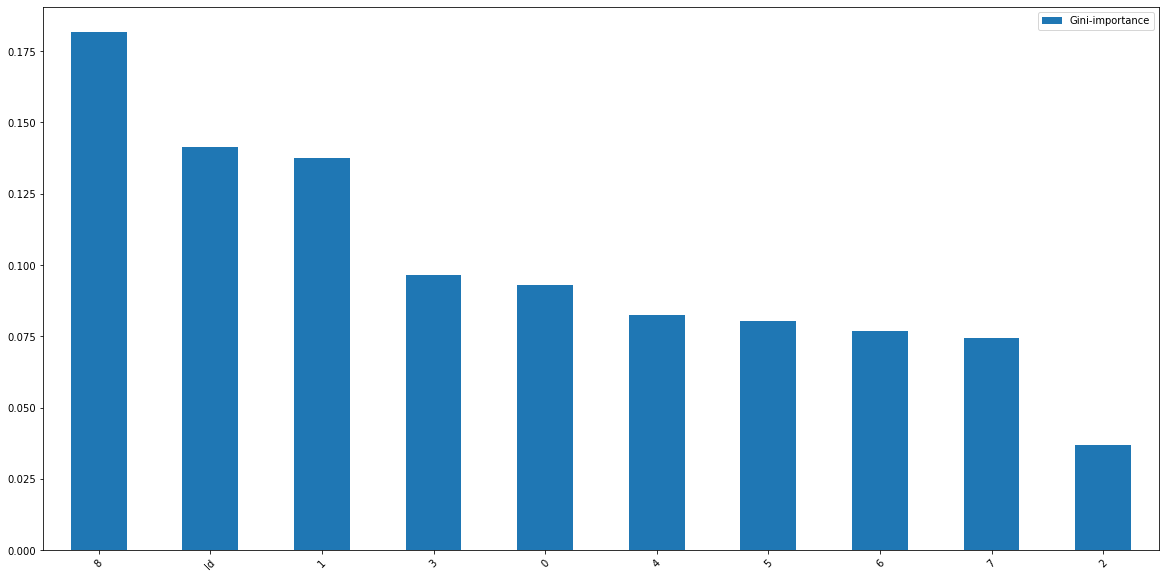

In [290]:
import pandas as pd
%matplotlib inline
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(data.columns, rf_rg_pipe.best_estimator_.named_steps['classifier'].feature_importances_):
    feats[feature] = importance #add the name/value pair 
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance',ascending = False).plot(kind='bar', rot=45,figsize=(20,10))

(8000, 110) (8000,)
(2000, 110) (2000,)


### AdaBoost

In [442]:
from sklearn.ensemble import AdaBoostClassifier


abc = AdaBoostClassifier()
#pipeline to include feature selection and model selection
pipeline = Pipeline([('kbest',SelectKBest()),('classifier', abc)])


param_grid = {
    'kbest__k':[20],
    "classifier__n_estimators": [500],
    "classifier__base_estimator":[None],
    "classifier__learning_rate":[0.01,0.1, 0.5, 1],
    "classifier__algorithm":['SAMME','SAMME.R']}


AdaBoost = RandomizedSearchCV(pipeline, 
                                param_grid, 
                                cv=5, 
                                scoring='f1_macro',
                                n_iter=50,verbose=2,
                                n_jobs=-1)

AdaBoost.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/Users/timothypillow/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 8 is smaller than n_iter=50. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   39.5s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   43.9s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('kbest',
                                              SelectKBest(k=10,
                                                          score_func=<function f_classif at 0x1229b5b70>)),
                                             ('classifier',
                                              AdaBoostClassifier(algorithm='SAMME.R',
                                                                 base_estimator=None,
                                                                 learning_rate=1.0,
                                                                 n_estimators=50,
                                                                 random_state=None))],
                                      verbose=False),
                   iid='deprecated', n_iter=50, n_jobs=-1,
                   param_distributions={'classifier__algorithm': ['SAMME',
       

In [443]:
AdaBoost.best_score_

0.4814642913623322

In [420]:
predict= pd.DataFrame(y_pred, columns=['Predicted']).reset_index()
predict2= predict.rename(columns={"index": "Id"})
predict2.to_csv('target_test.csv',index=False)